C:\Users\saura\AppData\Local\Temp\ipykernel_26772\2193912761.py:75: RuntimeWarning: overflow encountered in square
  cax.set_array(np.abs(psi)**2)
C:\Users\saura\AppData\Local\Temp\ipykernel_26772\2193912761.py:50: RuntimeWarning: overflow encountered in multiply
  return psi + (-1j * dt / hbar) * (-hbar**2 / (2 * m) * laplacian_psi + V * psi)
C:\Users\saura\AppData\Local\Temp\ipykernel_26772\2193912761.py:50: RuntimeWarning: invalid value encountered in multiply
  return psi + (-1j * dt / hbar) * (-hbar**2 / (2 * m) * laplacian_psi + V * psi)
C:\Users\saura\AppData\Local\Temp\ipykernel_26772\2193912761.py:44: RuntimeWarning: invalid value encountered in multiply
  return (np.roll(psi, 1, axis=0) + np.roll(psi, -1, axis=0) - 2 * psi) / dx**2 + \
C:\Users\saura\AppData\Local\Temp\ipykernel_26772\2193912761.py:44: RuntimeWarning: invalid value encountered in divide
  return (np.roll(psi, 1, axis=0) + np.roll(psi, -1, axis=0) - 2 * psi) / dx**2 + \
C:\Users\saura\AppData\Local\Temp\ipyker

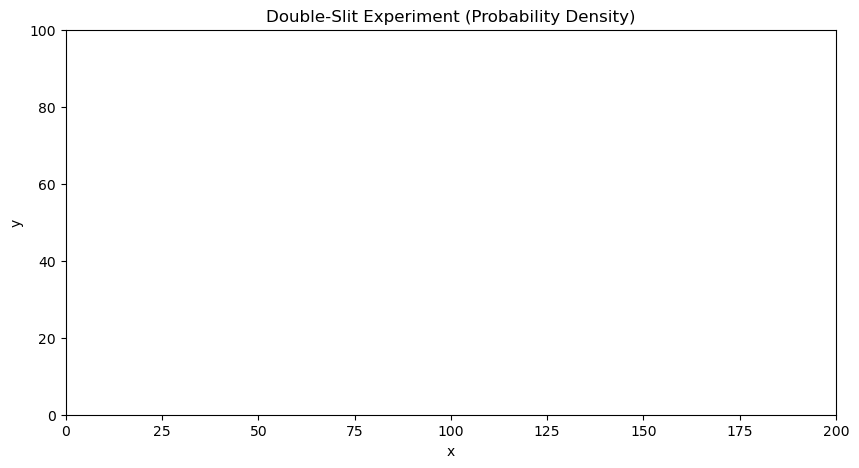

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
Lx = 200         # Size of the grid in x direction
Ly = 100         # Size of the grid in y direction
dx = 1.0         # Spatial step size
dy = 1.0
dt = 0.05        # Time step
T = 300          # Total simulation time steps
slit_width = 5   # Width of the slits
slit_distance = 30  # Distance between the slits
barrier_thickness = 2  # Thickness of the barrier
V0 = 1000.0      # Height of the potential barrier (for the slits)
hbar = 1.0       # Planck's constant (natural units)
m = 1.0          # Particle mass

# 2D Grid for space
x = np.linspace(0, Lx * dx, Lx)
y = np.linspace(0, Ly * dy, Ly)
X, Y = np.meshgrid(x, y)

# Define the potential with two slits
def double_slit_potential(Lx, Ly, slit_width, slit_distance, barrier_thickness):
    V = np.zeros((Ly, Lx))
    barrier_center_x = Lx // 3  # The barrier is placed 1/3rd of the grid
    # Vertical barrier with slits
    V[:, barrier_center_x:barrier_center_x + barrier_thickness] = V0
    # Open the slits by setting potential to 0 in two regions (slits)
    slit_top = (Ly // 2) + slit_distance // 2
    slit_bottom = (Ly // 2) - slit_distance // 2
    V[slit_bottom - slit_width // 2:slit_bottom + slit_width // 2, barrier_center_x:barrier_center_x + barrier_thickness] = 0
    V[slit_top - slit_width // 2:slit_top + slit_width // 2, barrier_center_x:barrier_center_x + barrier_thickness] = 0
    return V

# Initialize the wave packet (Gaussian shape)
def initialize_wave_packet(x0, y0, kx, ky, sigma_x, sigma_y, X, Y):
    return np.exp(-((X - x0)**2 / (2 * sigma_x**2) + (Y - y0)**2 / (2 * sigma_y**2))) * np.exp(1j * (kx * X + ky * Y))

# Laplacian operator (second derivative approximation)
def laplacian(psi, dx, dy):
    return (np.roll(psi, 1, axis=0) + np.roll(psi, -1, axis=0) - 2 * psi) / dx**2 + \
           (np.roll(psi, 1, axis=1) + np.roll(psi, -1, axis=1) - 2 * psi) / dy**2

# Time evolution of the wave function using the Schrödinger equation
def time_evolve(psi, V, dt, dx, dy):
    laplacian_psi = laplacian(psi, dx, dy)
    return psi + (-1j * dt / hbar) * (-hbar**2 / (2 * m) * laplacian_psi + V * psi)

# Initialize the potential (double slit)
V = double_slit_potential(Lx, Ly, slit_width, slit_distance, barrier_thickness)

# Initialize the wave packet (incoming particle from left)
x0 = Lx // 10     # Initial position of the wave packet (on the left side)
y0 = Ly // 2      # Centered in the y-direction
kx = 2.0          # Initial momentum in the x direction (wave vector)
ky = 0.0          # No initial momentum in the y direction
sigma_x = 10.0    # Width of the wave packet in x direction
sigma_y = 10.0    # Width of the wave packet in y direction
psi = initialize_wave_packet(x0, y0, kx, ky, sigma_x, sigma_y, X, Y)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.imshow(np.abs(psi)**2, extent=[0, Lx * dx, 0, Ly * dy], vmin=0, vmax=0.1, cmap='inferno')
ax.set_title('Double-Slit Experiment (Probability Density)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Animation update function
def update(frame):
    global psi
    psi = time_evolve(psi, V, dt, dx, dy)
    cax.set_array(np.abs(psi)**2)
    return cax,

# Run the animation
ani = FuncAnimation(fig, update, frames=T, interval=50)

HTML(ani.to_jshtml())


In [9]:
ani = FuncAnimation(fig, update, frames=T, interval=50)

ani.save('Projects/Animation.gif', writer='pillow')